# Subbundles Part 4: Adjacencies

**Subbundle** - a subgroup of streamlines with a set of common properties

In [1]:
from utils import get_tractogram_filename

import os.path as op

from AFQ import api
import AFQ.data as afd

import numpy as np
import pandas as pd

from dipy.io.streamline import load_tractogram
import dipy.tracking.streamline as dts

import matplotlib.pyplot as plt

/Users/bloomdt/anaconda/envs/subbundles/lib/python3.8/site-packages/dask/dataframe/utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Streamlines (from Part 2)

Necessary to calculate mfd adjacency

In [2]:
myafq = api.AFQ(
    bids_path=op.join(afd.afq_home, 'stanford_hardi'),
    dmriprep='vistasoft'
)

row = myafq.data_frame.iloc[0]

INFO:dipy.data.fetcher:Dataset is already in place. If you want to fetch it again please first remove the folder /Users/bloomdt/AFQ_data/templates 
INFO:dipy.data.fetcher:Dataset is already in place. If you want to fetch it again please first remove the folder /Users/bloomdt/AFQ_data/callosum_templates 
/Users/bloomdt/anaconda/envs/subbundles/lib/python3.8/site-packages/bids/layout/models.py:98: FutureWarning: The 'extension' entity currently excludes the leading dot ('.'). As of version 0.14.0, it will include the leading dot. To suppress this warning and include the leading dot, use `bids.config.set_option('extension_initial_dot', True)`.
  warnings.warn("The 'extension' entity currently excludes the leading dot ('.'). "


In [3]:
bundle_name='SLF_L'
tg_fname = tg_fname = get_tractogram_filename(myafq, bundle_name)
tractogram = load_tractogram(tg_fname, 'same')
streamlines = tractogram.streamlines
affine = tractogram.affine

## Streamline Profiles (from Part 3)

In [4]:
fa_values = np.load('streamline_profile_fa.npy')
md_values = np.load('streamline_profile_md.npy')

## Distance/Adjacency Matrix of Streamline Correlations

<span style="color:blue">**TODO: Not sure that these matricies really [adjacencies](https://mathworld.wolfram.com/AdjacencyMatrix.html)**</span>

- <span style="color:red">**Question: Terminology perhaps should simply call them correlation matrcies?**</span>

An $N \times N$ matrix of coorelations of streamline tract profiles, where $N$ is the number of streamline profiles
  
  - **single matrix and single metric**
  
  - **single matrix and multiple metrics (weighted linear combination)**
    
    - manually stacked 
      
    - learn hyperparameters
      
  - *multiple matrices (tensor) and multiple metrics* (optional)

### Streamline Correlations

### <span style="color:red">NOTE: There are multiple correlation metrics, using Pearson's r</span>

- <span style="color:red">**Question: are streamline profiles considered: measurement, ordinal, or categorical?**</span>

  - For now stick with Pearson's r

### <span style="color:red">NOTE: There are multiple python implementations to compute correlation</span>

- Haven't [compared or contrasted benefits](https://realpython.com/numpy-scipy-pandas-correlation-python/) of `NumPy`, `SciPy`, or `Pandas`

##### Candidiate [Correlation Coefficients](https://en.wikipedia.org/wiki/Correlation_coefficient#Types):

- Pearson's r

- [Rank correlation](https://en.wikipedia.org/wiki/Rank_correlation) coefficients

  - Spearman's $\rho$

  - Kendall's $\tau$
  
  - ...

##### FA

In [5]:
fa_df = pd.DataFrame(fa_values.T)
fa_corr = fa_df.corr()

print(fa_corr.shape)
print(fa_corr.head())

np.save('adjacency_fa.npy', fa_corr.to_numpy())

(465, 465)
        0         1         2         3         4         5         6    \
0  1.000000  0.882085  0.890257  0.558226  0.633334  0.776883  0.516523   
1  0.882085  1.000000  0.892869  0.691708  0.613339  0.720867  0.445386   
2  0.890257  0.892869  1.000000  0.692492  0.738387  0.804009  0.646199   
3  0.558226  0.691708  0.692492  1.000000  0.675228  0.649760  0.573325   
4  0.633334  0.613339  0.738387  0.675228  1.000000  0.797512  0.865986   

        7         8         9    ...       455       456       457       458  \
0  0.685918  0.604393  0.704893  ...  0.304867  0.318514  0.317555  0.253821   
1  0.642329  0.555229  0.638696  ...  0.298098  0.338879  0.283364  0.288640   
2  0.767272  0.708093  0.794917  ...  0.371554  0.405669  0.355182  0.372981   
3  0.658389  0.592143  0.579051  ...  0.176189  0.307546  0.267071  0.280450   
4  0.919683  0.784439  0.792001  ...  0.389692  0.363524  0.234314  0.270914   

        459       460       461       462       463      

##### MD

In [6]:
md_df = pd.DataFrame(md_values.T)
md_corr = md_df.corr()

print(md_corr.shape)
print(md_corr.head())

np.save('adjacency_md.npy', md_corr.to_numpy())

(465, 465)
        0         1         2         3         4         5         6    \
0  1.000000  0.793244  0.818938  0.559873  0.386459  0.493746  0.342482   
1  0.793244  1.000000  0.930559  0.630848  0.545399  0.644990  0.471161   
2  0.818938  0.930559  1.000000  0.634464  0.552601  0.677292  0.505378   
3  0.559873  0.630848  0.634464  1.000000  0.650833  0.663157  0.448061   
4  0.386459  0.545399  0.552601  0.650833  1.000000  0.867259  0.723318   

        7         8         9    ...       455       456       457       458  \
0  0.348693  0.418816  0.473305  ...  0.656315  0.614037  0.831250  0.621922   
1  0.547331  0.626289  0.712350  ...  0.663411  0.587650  0.729432  0.591102   
2  0.550235  0.635176  0.715263  ...  0.689260  0.637978  0.737541  0.639177   
3  0.606575  0.511968  0.566453  ...  0.519041  0.553736  0.425878  0.492955   
4  0.931270  0.662321  0.669176  ...  0.715378  0.754388  0.398269  0.725093   

        459       460       461       462       463      

##### $\alpha$ FA + $\beta$ MD 

Weighted linear combination

In [7]:
alpha, beta = [0.5, 0.5]

weighted = 0.5 * fa_corr + 0.5 * md_corr

print(weighted.shape)
print(weighted.head())

np.save('adjacency_wt.npy', weighted.to_numpy())

(465, 465)
        0         1         2         3         4         5         6    \
0  1.000000  0.837664  0.854597  0.559049  0.509897  0.635314  0.429502   
1  0.837664  1.000000  0.911714  0.661278  0.579369  0.682929  0.458273   
2  0.854597  0.911714  1.000000  0.663478  0.645494  0.740650  0.575789   
3  0.559049  0.661278  0.663478  1.000000  0.663031  0.656459  0.510693   
4  0.509897  0.579369  0.645494  0.663031  1.000000  0.832385  0.794652   

        7         8         9    ...       455       456       457       458  \
0  0.517305  0.511605  0.589099  ...  0.480591  0.466276  0.574403  0.437871   
1  0.594830  0.590759  0.675523  ...  0.480754  0.463265  0.506398  0.439871   
2  0.658753  0.671634  0.755090  ...  0.530407  0.521823  0.546362  0.506079   
3  0.632482  0.552056  0.572752  ...  0.347615  0.430641  0.346475  0.386703   
4  0.925477  0.723380  0.730588  ...  0.552535  0.558956  0.316291  0.498003   

        459       460       461       462       463      

#### <span style="color:blue">**TODO: Coefficient of determination**</span>

In Schurr 2019 paper, main differentiating factors between SLFII and the other SLF sections are offsets in the mean FA between streamlines. 

Consider use a distance function that takes into account the offset, and not only co-variation, like:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [8]:
from sklearn.metrics import r2_score

fgarray = np.array(dts.set_number_of_points(streamlines, 100))
r2 = pd.DataFrame([[r2_score(a,b) for a in fgarray] for b in fgarray])

print(r2.shape)
print(r2.head())

np.save('adjacency_r2.npy', r2.to_numpy())

(465, 465)
        0         1         2         3         4         5         6    \
0  1.000000  0.965553  0.955606  0.755725  0.172403  0.080605  0.202922   
1  0.958335  1.000000  0.973569  0.883134  0.032060 -0.194007  0.079324   
2  0.959581  0.976100  1.000000  0.896647  0.300170  0.134881  0.360598   
3  0.768498  0.901135  0.890487  1.000000 -0.114340 -0.526090 -0.000353   
4  0.474810  0.483688  0.621132  0.526388  1.000000  0.948086  0.978525   

        7         8         9    ...       455       456       457       458  \
0  0.141238  0.747652  0.799847  ...  0.073243  0.513796 -0.998765  0.494018   
1 -0.073921  0.843453  0.861517  ... -0.010603  0.473189 -1.474571  0.446953   
2  0.247577  0.903656  0.930615  ... -0.089947  0.446519 -1.151416  0.414131   
3 -0.281006  0.916792  0.884548  ... -0.427102  0.235958 -2.168506  0.183226   
4  0.985146  0.748262  0.778650  ... -0.640166  0.027477 -0.413377 -0.018836   

        459       460       461       462       463      

### <span style="color:blue">**TODO**</span> Distance Metrics

Given: 

- NxN streamlines 

Assuming:

- same subject

- same streamlines

Anything varies streamlines would violate assumptions:

- comparing subjects

- using different tractometry, segmentation, or metrics

Want:

- a distance metric that is similar to correlation

  - bounded between 0 and 1
  
  - 0 signifies streamlines are infinitely far apart
  
  - 1 signifies same streamline

Consider: 

- MDF between every pair

- Threshold distance $\theta$

  - If distance is greater than threshold then streamlines are considered infinitely far apart (not part of the same subbundle)

##### [Bundle Adjacency (BA)](https://www.nature.com/articles/s41598-020-74054-4)

> Use bundle adjacency (BA) to calculate the shape similarity between the same type of bundles **across subjects and groups** ... BA uses a minimum direct flip (MDF) distance to get the distance between two streamlines

> 𝐵𝐴(𝐵1,𝐵2)=0.5(𝑐𝑜𝑣𝑒𝑟𝑎𝑔𝑒(𝐵1,𝐵2)+𝑐𝑜𝑣𝑒𝑟𝑎𝑔𝑒(𝐵2,𝐵1))

#### MDF

https://dipy.org/documentation/1.2.0./reference/dipy.segment/#bundles-distances-mdf

In [9]:
fgarray = np.array(dts.set_number_of_points(streamlines, 100))
mdf = pd.DataFrame(dts.bundles_distances_mdf(fgarray, fgarray))

print(mdf.shape)
print(mdf.head())

np.save('adjacency_mdf.npy', mdf.to_numpy())

(465, 465)
        0         1         2         3         4          5         6    \
0  0.000000  2.556787  3.050165  7.892504  9.566525   9.116579  9.715490   
1  2.556787  0.000000  1.846113  5.549762  9.376993   9.667726  9.184445   
2  3.050165  1.846113  0.000000  5.331358  8.321434   8.769215  7.917379   
3  7.892504  5.549762  5.331358  0.000000  9.645145  11.535656  8.619782   
4  9.566525  9.376993  8.321434  9.645145  0.000000   2.547179  1.788271   

        7         8         9    ...        455        456        457  \
0  9.153671  6.666740  5.791087  ...  12.268264  11.370953  13.095141   
1  9.099032  5.035235  4.616476  ...  11.839233  10.927974  15.045596   
2  7.956161  4.014346  3.047695  ...  11.788706  10.834809  14.521595   
3  9.945946  4.020088  4.664461  ...  13.915105  13.095520  19.092976   
4  1.372938  6.632364  6.410689  ...  17.450544  17.250725  13.569562   

         458        459        460        461        462        463        464  
0  10.822467

### <span style="color:blue">**TODO**</span> Compare Matricies

Once get streamline correlation matricies:

- Begin with "eye-ball comparison" between FA and MD matrices

- Then consider difference of adjacency matrices


- <span style="color:red">**Question: What is the 'correct' way compare these matricies?**</span>

  - Check how much information is shared
  
    (mutual information: $I(X,Y)$ or alternatively sum of conditional information -- only present in one of the matricies: $H(X,Y)-I(X,Y)=H(Y|X)+H(X|Y)$)

<span style="color:red">**NOTE: we are assuming that streamlines are same (from same individual and same same tractography)**</span>

##### "Eye-ball"

##### FA

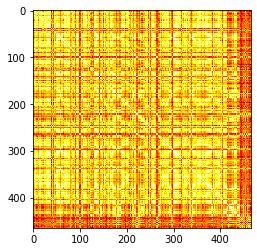

In [10]:
plt.imshow(fa_corr, cmap='hot', interpolation='nearest')
plt.show()

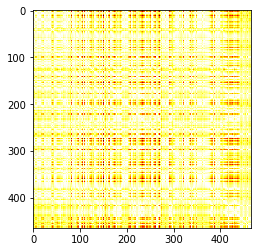

In [11]:
plt.imshow(r2, cmap='hot', interpolation='nearest')
plt.show()

##### MD

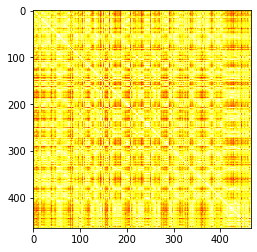

In [12]:
plt.imshow(md_corr, cmap='hot', interpolation='nearest')
plt.show()

##### Absolute Difference

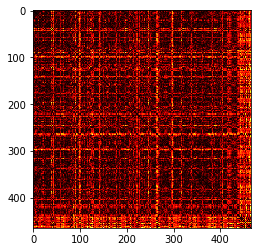

In [13]:
del_corr = np.abs(fa_corr-md_corr)
plt.imshow(del_corr, cmap='hot', interpolation='nearest')
plt.show()

##### $\alpha$ FA + $\beta$ MD

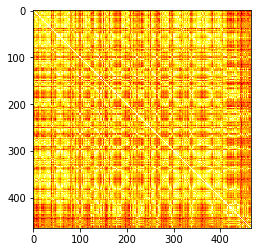

In [14]:
plt.imshow(weighted, cmap='hot', interpolation='nearest')
plt.show()

#### MDF

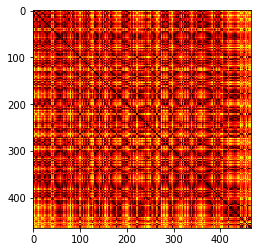

In [15]:
plt.imshow(mdf, cmap='hot', interpolation='nearest')
plt.show()